# Performance Metrics
- ตัวชี้วัดที่ใช้ประเมินประสิทธิภาพของหุ้นหรือพอร์ตโฟลิโอหุ้นที่นักลงทุนถืออยู่ ตัวชี้วัดเหล่านี้มีไว้เพื่อวัดการทำงานของการลงทุนและช่วยในการตัดสินใจด้านการลงทุน โดยให้ภาพรวมของความเสี่ยงและผลตอบแทน รวมถึงเปรียบเทียบประสิทธิภาพกับตลาดหรือมาตรฐานอื่น ๆ นอกจากนี้ยังช่วยให้นักลงทุนประเมินว่ากลยุทธ์การลงทุนของตนเองนั้นมีประสิทธิผลหรือไม่

## Max Drawdown
- วัดการลดลงสูงสุดของมูลค่าพอร์ตโฟลิโอจากจุดสูงสุดถึงจุดต่ำสุดก่อนที่จะกลับมาเติบโตอีกครั้ง ซึ่งช่วยให้เห็นภาพความเสี่ยงของการลงทุนในช่วงเวลาหนึ่ง

In [718]:
import starfishXapi as sx
sx.enable_autoreload()
print(sx.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Autoreload enabled.
0.00104


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example: Simulated portfolio value series
data = {'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'Portfolio Value': [100, 102, 105, 103, 98, 95, 97, 96, 101, 104]}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate the cumulative maximum
df['Cumulative Max'] = df['Portfolio Value'].cummax()

# Calculate drawdown
df['Drawdown'] = df['Portfolio Value'] / df['Cumulative Max'] - 1

# Calculate the max drawdown
max_drawdown = df['Drawdown'].min()

print("Max Drawdown: {:.2%}".format(max_drawdown))

Max Drawdown: -9.52%


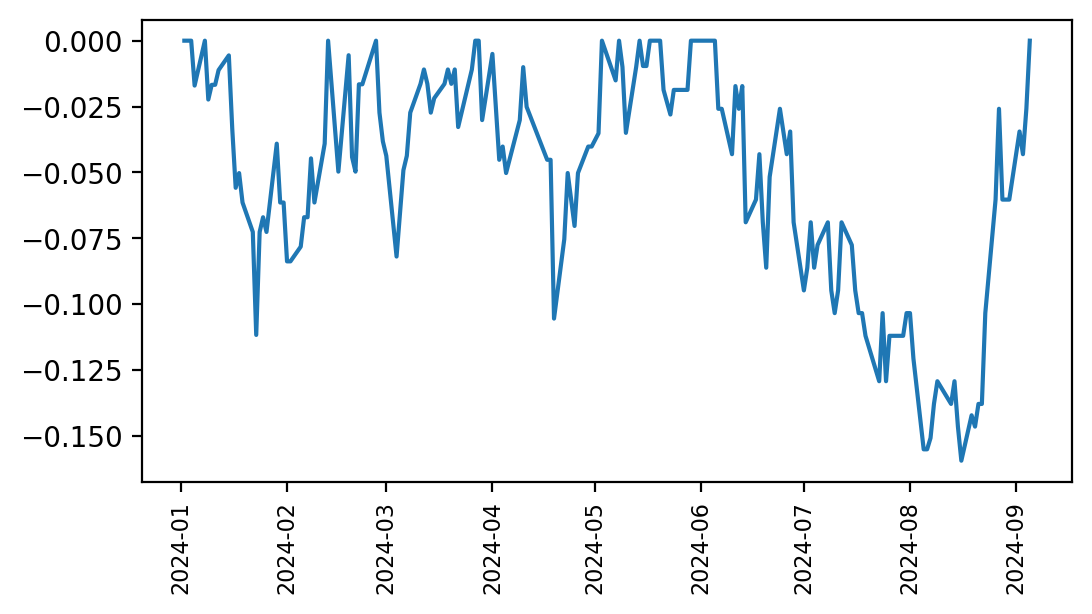

In [88]:
plt.subplots(figsize=(6,3))
plt.plot(df.index,df['Drawdown'])
plt.xticks(rotation=90,fontsize=8)
plt.show()

In [60]:
# การลงของหุ้นมากที่สุดในวันที่ 6
df

Portfolio Value  Cumulative Max  Drawdown
Date                                                 
2023-01-01              100             100  0.000000
2023-01-02              102             102  0.000000
2023-01-03              105             105  0.000000
2023-01-04              103             105 -0.019048
2023-01-05               98             105 -0.066667
2023-01-06               95             105 -0.095238
2023-01-07               97             105 -0.076190
2023-01-08               96             105 -0.085714
2023-01-09              101             105 -0.038095
2023-01-10              104             105 -0.009524

In [201]:
# ทดสอบการทำงาน
dataReader = sx.HistStockPrice()

In [333]:
symbol = 'aura'
start = '2024-01-01'
stop = '2024-10-18'
df = dataReader.getPrice(symbol=symbol,start=start,stop=stop)
df.tail(5)

open  high   low  close     volume
Date                                          
2024-10-11  15.0  15.0  14.7   14.9   602465.0
2024-10-15  14.8  14.8  14.5   14.5  1429151.0
2024-10-16  14.4  15.0  14.1   14.8  1975289.0
2024-10-17  14.8  14.9  14.5   14.5   554096.0
2024-10-18  14.5  14.8  14.5   14.6   461171.0

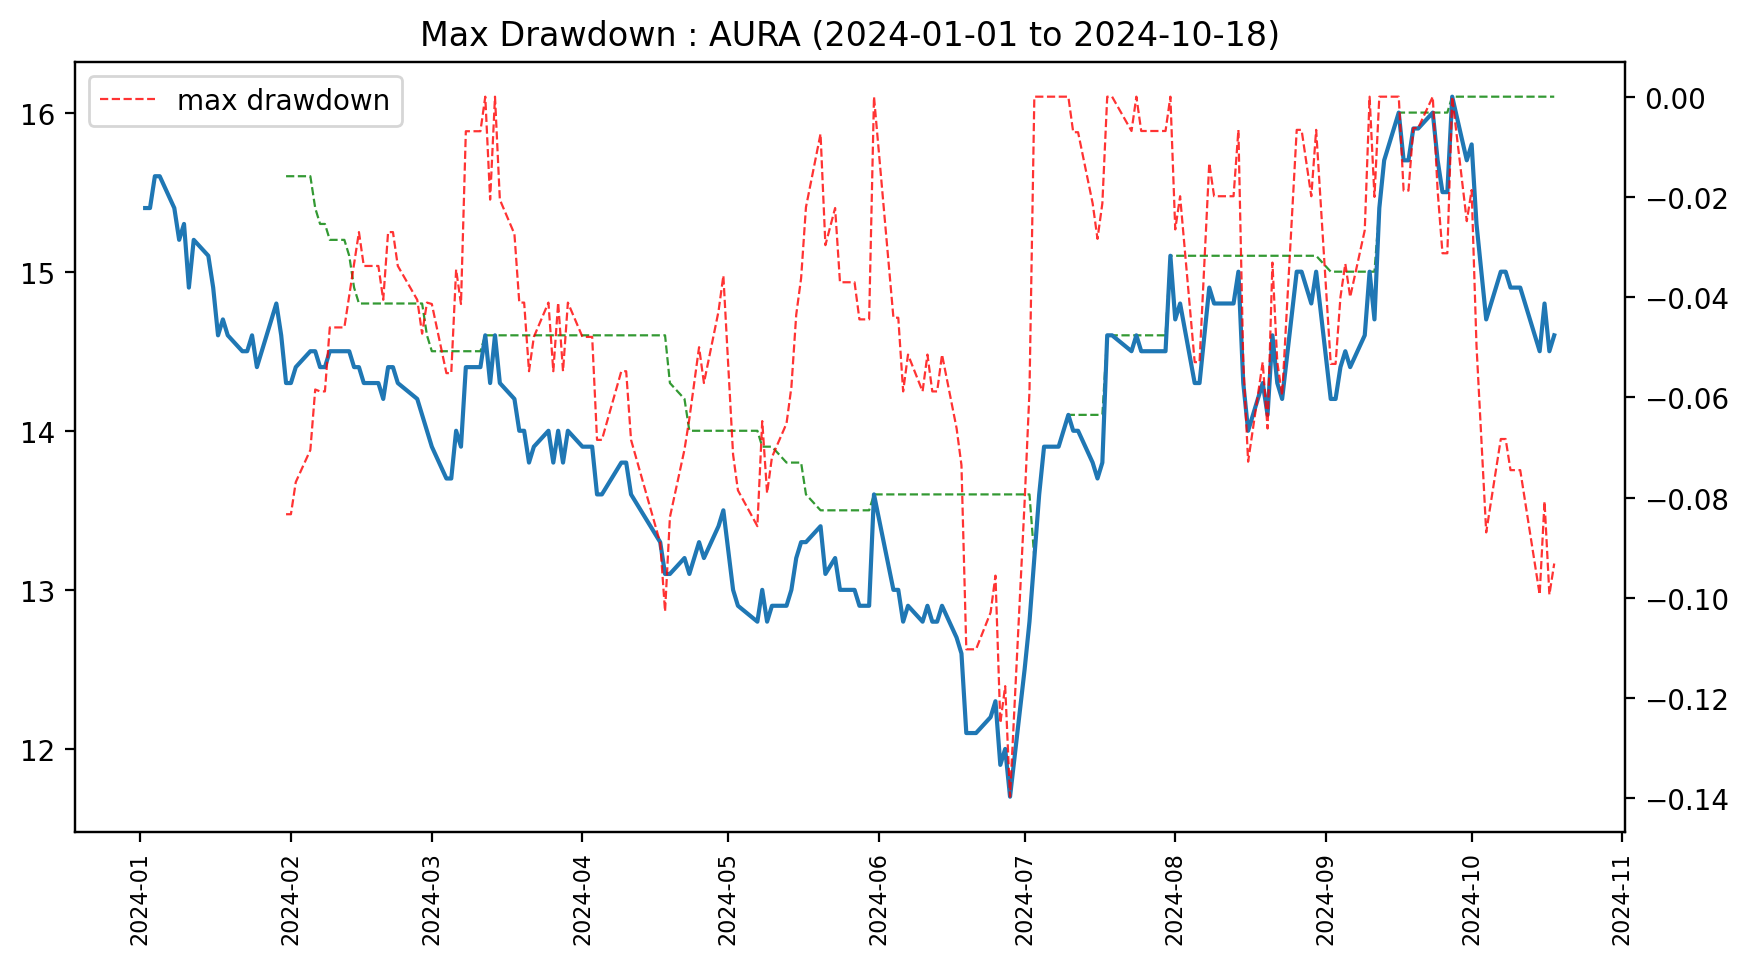

In [361]:
# หากต้องการ max_drawdown ในช่วงวันหลังสุด ์N วัน
report = df[['close']].max_drawdown(period=22)

fig , ax1 =  plt.subplots(figsize=(10,5))
ax1.plot(report.index,report['Cumulative Max'],color='green',alpha=0.8,linewidth=0.8,linestyle='--')
ax1.plot(report.index,report['close'],label='close')
plt.xticks(rotation=90,fontsize=8)

ax2 = ax1.twinx()
ax2.plot(report.index,report['Drawdown'],color='red',alpha=0.8,linewidth=0.8,linestyle='--',label='max drawdown')

plt.title(f'Max Drawdown : {symbol.upper()} ({start} to {stop})')
ax2.legend()
plt.show()

In [345]:
report['Drawdown'].min()

-0.13970588235294124

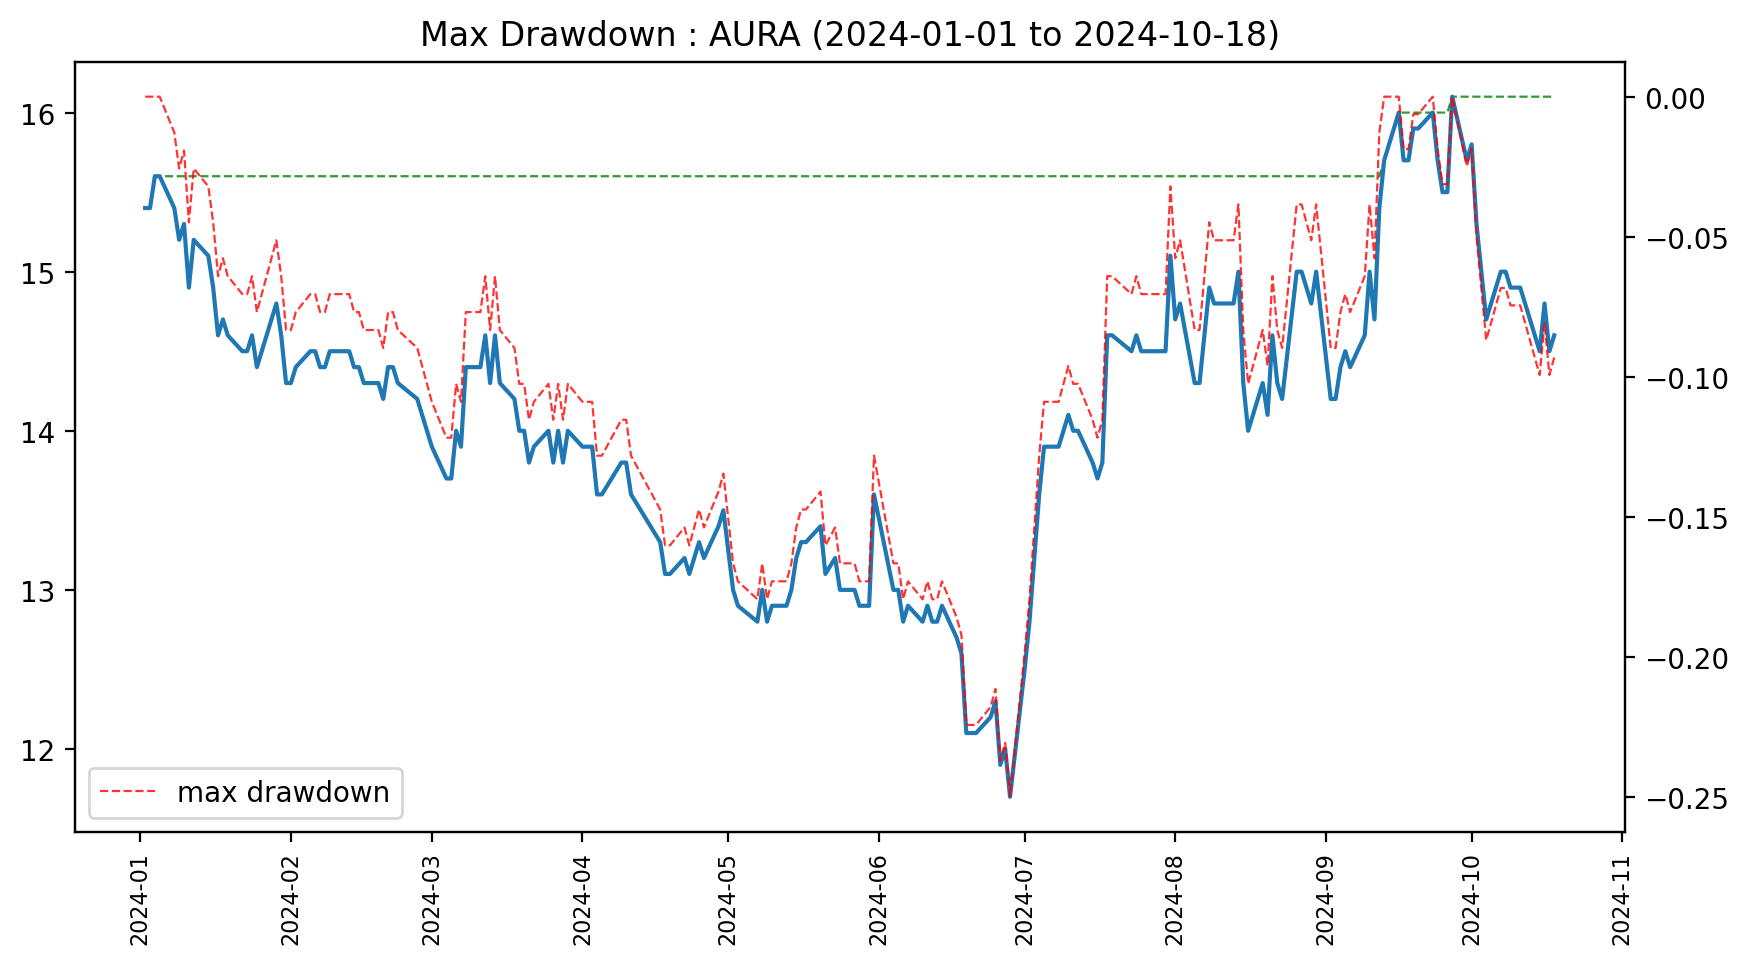

In [363]:
report = df[['close']].max_drawdown()

fig , ax1 =  plt.subplots(figsize=(10,5))
ax1.plot(report.index,report['Cumulative Max'],color='green',alpha=0.8,linewidth=0.8,linestyle='--')
ax1.plot(report.index,report['close'])
plt.xticks(rotation=90,fontsize=8)

ax2 = ax1.twinx()
ax2.plot(report.index,report['Drawdown'],color='red',alpha=0.8,linewidth=0.8,linestyle='--',label='max drawdown')

plt.title(f'Max Drawdown : {symbol.upper()} ({start} to {stop})')
plt.legend()
plt.show()

In [365]:
report['Drawdown'].min()

-0.25

## CAGR
- Compound Annual Growth Rate คืออัตราการเติบโตเฉลี่ยต่อปีของการลงทุนหรือมูลค่าทรัพย์สินที่มีการทบต้นทุกปี

![image](_static/cagr.png)

In [506]:
days = 365 * 3
years = days / 365  # Convert days to fraction of years
final_value = 150000
initial_value = 100000
CAGR = (final_value / initial_value) ** (1 / years) - 1

print(CAGR)

0.14471424255333187


In [544]:
start = '2020-01-01'
stop = '2024-10-18'
start_date = pd.to_datetime(start)
end_date = pd.to_datetime(stop)

# Calculate the difference in calendar days
days_difference = (end_date - start_date).days
days_difference

1752

In [760]:
# การนำไปใช้งานในหุ้น
symbol = 'aapl'
start = '2020-01-01'
stop = '2024-10-18'
df = dataReader.getPrice(symbol=symbol,exchange='nasdaq',start=start,stop=stop)
df.head(1)

open   high      low    close       volume
Date                                                   
2020-01-02  74.06  75.15  73.7975  75.0875  135647456.0

In [766]:
df.tail(1)

open    high     low  close      volume
Date                                                 
2024-10-18  236.18  236.18  234.01  235.0  46431472.0

In [774]:
m = df[['close']].CAGR(start=start,stop=stop,view_log=True)
print(m)

จำนวนวันทั้งหมด 1752 วัน คิดเป็น 4.8 ปี
0.2683210837417682


In [768]:
(235/75.0875)**(1/4.8)-1

0.2683210837417682

In [744]:
# ตรวจคำตอบ
(75.0875)*((1+0.2683210837417682)**4.8)

235.00000000000003

## Standard Deviation
- ความผันผวนของอัตราการเปลี่ยนแปลงของราคา (Volatility) เป็นรายปี
- มาตรวัดความผันผวนของผลตอบแทนจากการลงทุน ซึ่งบ่งบอกถึงความแปรปรวนหรือความไม่แน่นอนของผลตอบแทนในช่วงระยะเวลาหนึ่ง มันเป็นตัวชี้วัดว่าผลตอบแทนของสินทรัพย์นั้นเบี่ยงเบนไปจากค่าเฉลี่ยมากน้อยเพียงใด

In [747]:
df[['close']].std_volatility()

0.5720937579496619

## Sharpe Ratio
- อัตราผลตอบแทนต่อความเสี่ยง โดยใช้ Volatility เป็นตัววัดความเสี่ยง 
![image](_static/sharpe_ratio.png)

In [750]:
# กำหนด risk free
rf = 0.02
shape_ratio,a,b = df[['close']].shape_ratio(riskFree=rf)
print(shape_ratio)

-0.37412105824187386


## Sortino Ratio
วัดผลตอบแทนที่ได้รับจากการลงทุนเมื่อเทียบกับความเสี่ยงขาลง (Downside Risk) คล้ายกับ Sharpe Ratio แต่คำนวณความเสี่ยงเฉพาะด้านลบ แทนที่จะใช้ความผันผวนทั้งหมด ดังนั้น Sortino Ratio จะโฟกัสเฉพาะความเสี่ยงที่ทำให้เกิดการขาดทุน

In [753]:
# กำหนด risk free
rf = 0.02
sortino_ratio,a,b = df[['close']].sortino_ratio(riskFree=rf)
print(sortino_ratio)

-0.5279274281972818


🚨 หาก Sortino Ratio สูงกว่า Sharpe Ratio หมายความว่า ความเสี่ยงขาลงต่ำกว่าความเสี่ยงทั้งหมด

## Perf Stat
- วัดผลโดยรวม ในส่วนของ Data frame หรือ Equity curve ของคุณ

In [776]:
# วัดผล dataframe หรือ 
report = df[['close']].perf_stat(start,stop,riskFree=0.02)
report

stat
Max Drawdown  -0.314273
CAGR           0.268321
Volatility     0.321630
Shape Ratio    0.839296
Sortino Ratio  1.245316